In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from cartopy.mpl.ticker import LongitudeFormatter,LatitudeFormatter
import matplotlib.dates as mdates

In [2]:
ds = xr.open_zarr('data_figS6.zarr/')

/home/jufen.lai/miniconda3/envs/work/lib/python3.8/site-packages/matplotlib/contour.py:1486: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/home/jufen.lai/miniconda3/envs/work/lib/python3.8/site-packages/matplotlib/contour.py:1487: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


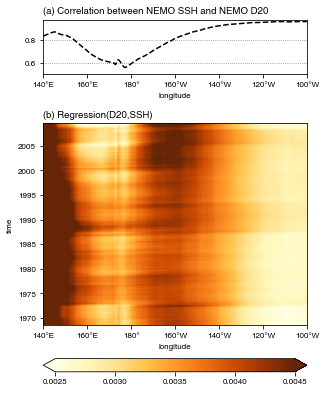

In [5]:
width = 120*0.0393700787
fig = plt.figure(figsize=(width,7))
plt.rcParams['font.size'] = 8
from matplotlib import rc
import matplotlib.ticker as mticker
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})

ax1 = plt.subplot2grid((5, 1), (0, 0), colspan=1)
ax1.xaxis.set_major_formatter(LongitudeFormatter())
ds.corr_d20_ssh.plot(color='black', linestyle='--')
plt.ylim(0.5,0.98)
plt.ylabel('')
plt.xlim(140,260)
plt.grid(color='grey',linestyle = ':',axis='y')
plt.title('(a) Correlation between NEMO SSH and NEMO D20',loc='left')
plt.title('')
plt.xlabel('longitude');


ax2 = plt.subplot2grid((4, 1), (1, 0), rowspan=3)
ax2.xaxis.set_major_formatter(LongitudeFormatter())
year =  mdates.YearLocator(5,month=1) 
locator = mticker.MultipleLocator(0.0005)
ax2.yaxis.set_major_locator(year)   
ax2.yaxis.set_major_formatter(mdates.DateFormatter('%Y')) # %Y-%m
im=ds.slope.plot(vmin=0.0025, vmax=0.0045,cmap=plt.cm.YlOrBr, add_colorbar=False,rasterized=True)
fig.colorbar(im,extend="both",orientation='horizontal',ticks=locator,pad=0.12)
ds.non_sig.plot.contourf(hatches=['.'], colors="None", add_colorbar=False) 
plt.title("(b) Regression(D20,SSH)",loc='left');
plt.title('')
plt.xlim(140, 260);
plt.ylabel("time");
plt.xlabel('longitude');


plt.subplots_adjust(wspace =0.5, hspace = 0.5)

plt.savefig("figS6.pdf", format="pdf", bbox_inches="tight")
plt.show()